<a href="https://colab.research.google.com/github/omniaghazy/first-_deploy/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [178]:

df = pd.read_csv("/content/Wholesale customers data.csv" , header= 0)


In [179]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [180]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [181]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [182]:
df.shape

(440, 8)

In [183]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [184]:
df.duplicated().sum()

np.int64(0)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [186]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<Axes: >

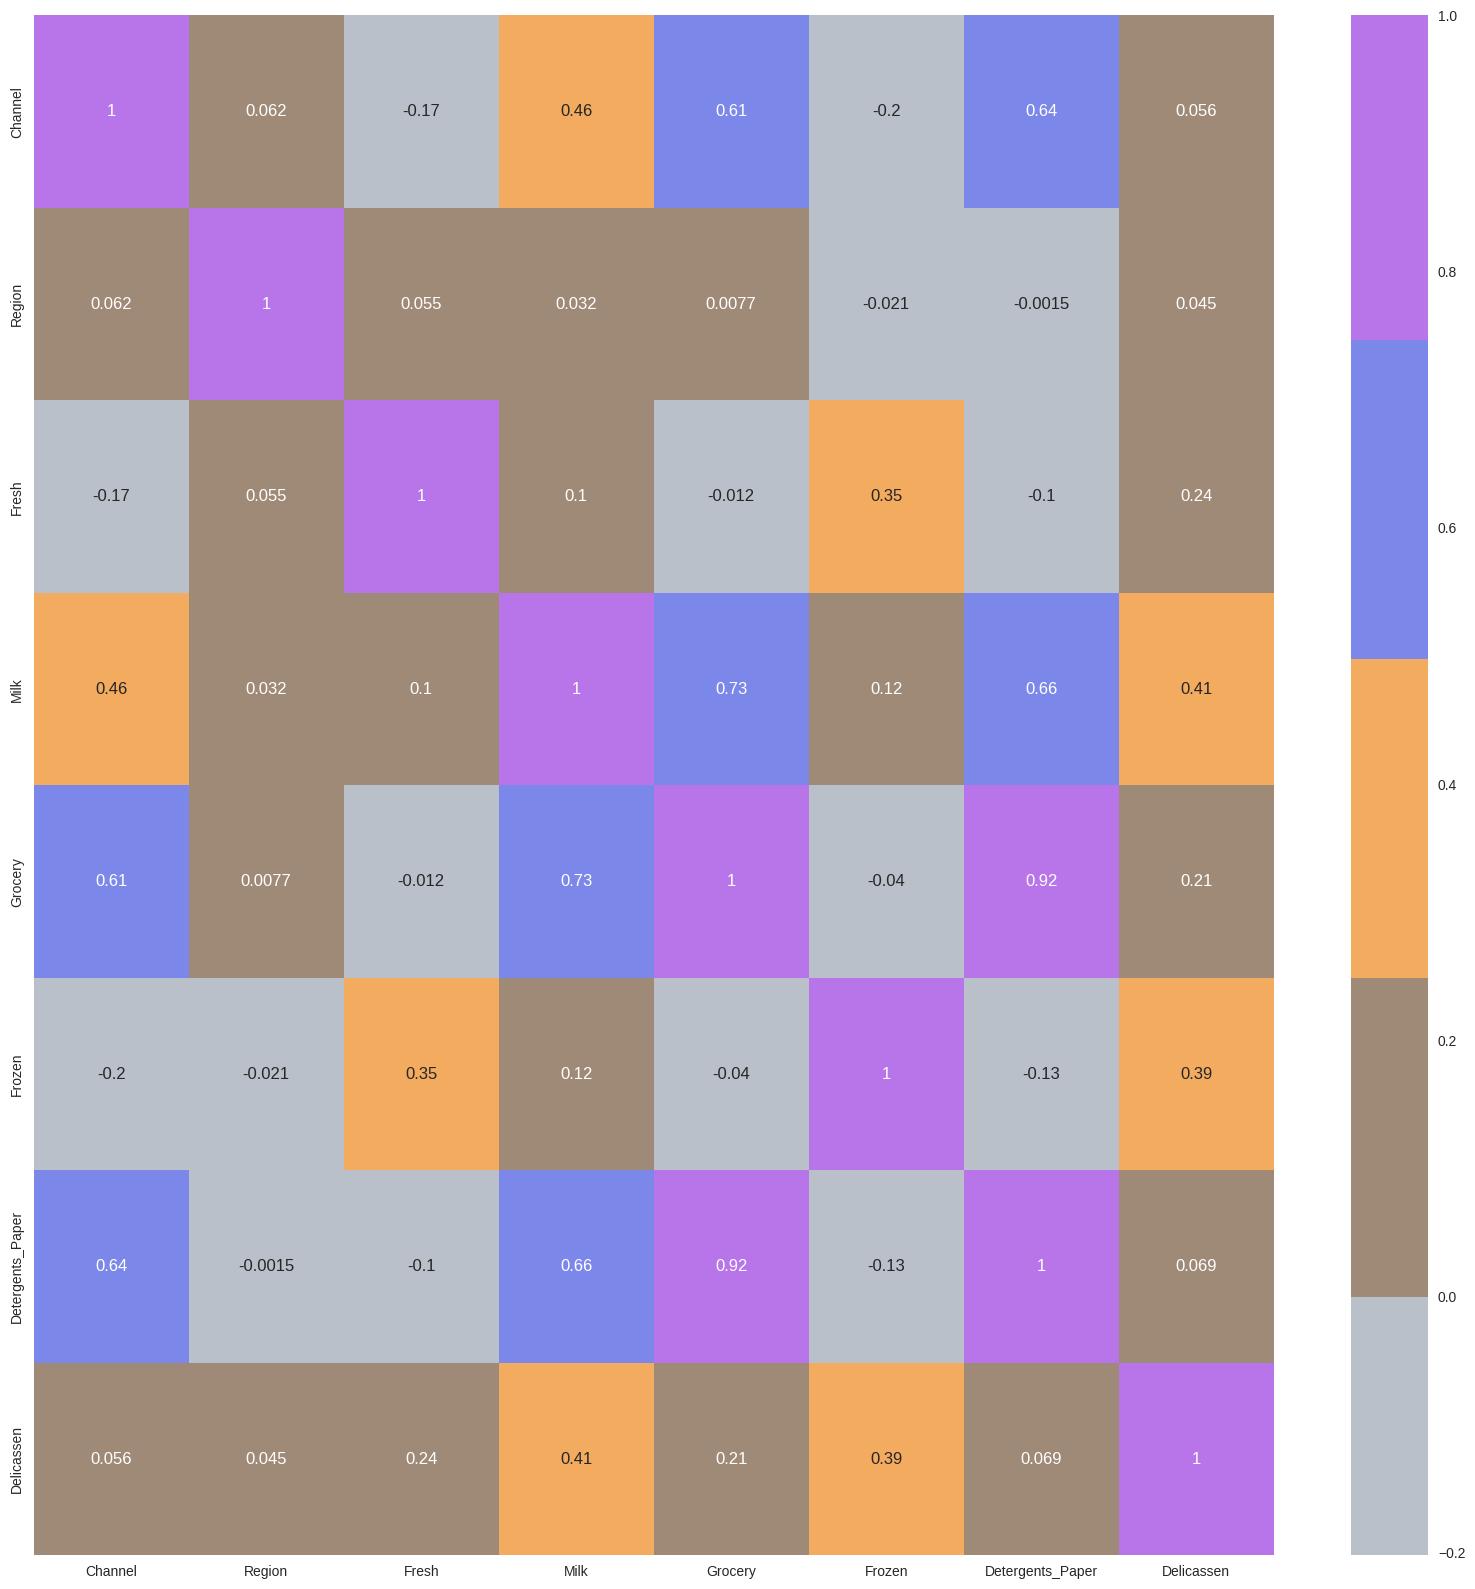

In [187]:
#correlation matrix
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60" ,"#7B87E9" ,"#B874E9"])
corrmat= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Channel
Channel
1    298
2    142
Name: count, dtype: int64


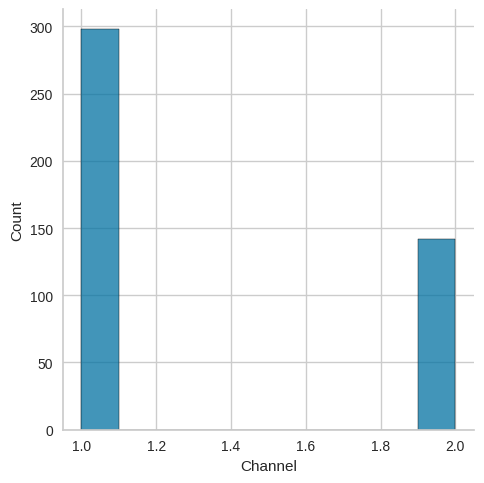

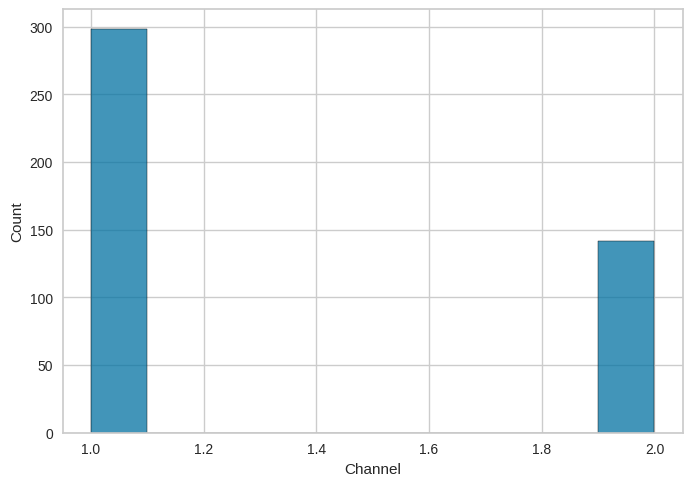

Region
Region
3    316
1     77
2     47
Name: count, dtype: int64


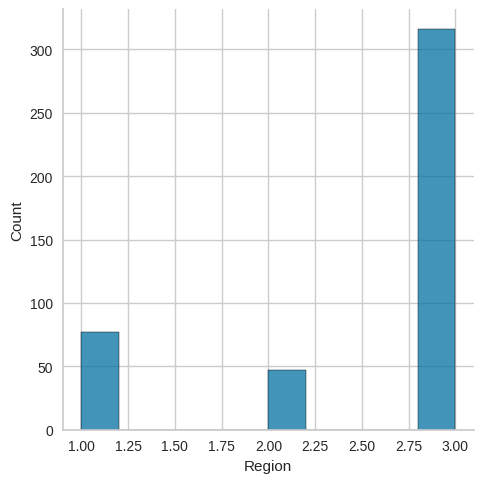

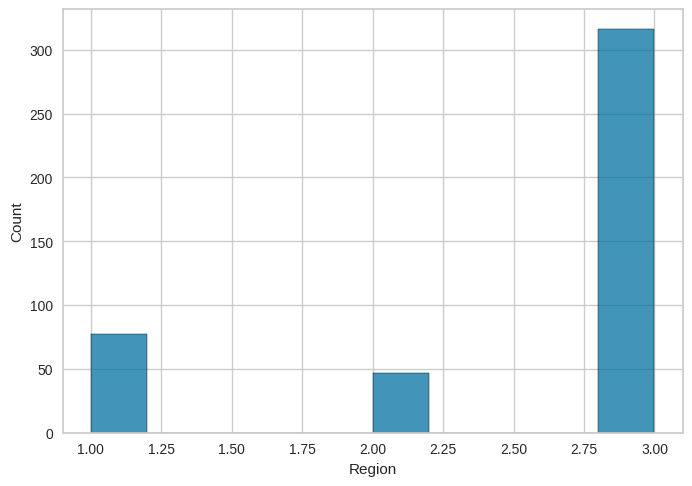

Fresh
Fresh
3        2
8040     2
18044    2
9670     2
3366     2
        ..
30379    1
17623    1
5387     1
13537    1
1289     1
Name: count, Length: 433, dtype: int64


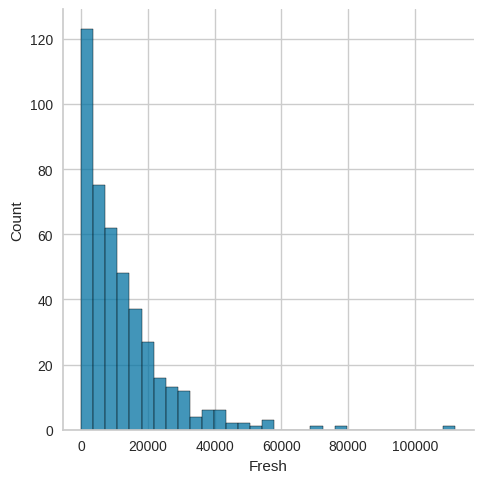

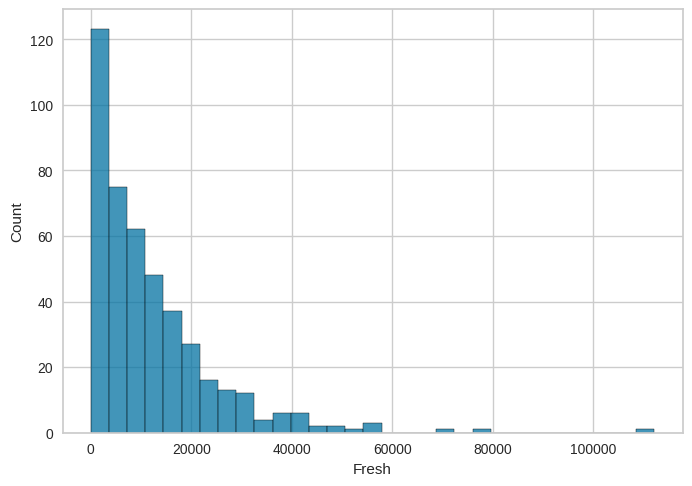

Milk
Milk
1610    2
3045    2
1032    2
2884    2
5139    2
       ..
4979    1
4257    1
8080    1
8579    1
584     1
Name: count, Length: 421, dtype: int64


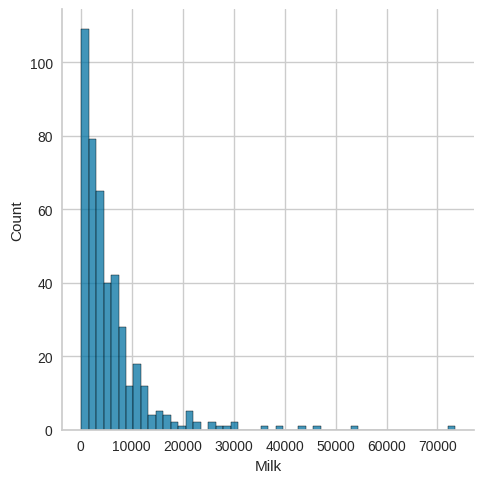

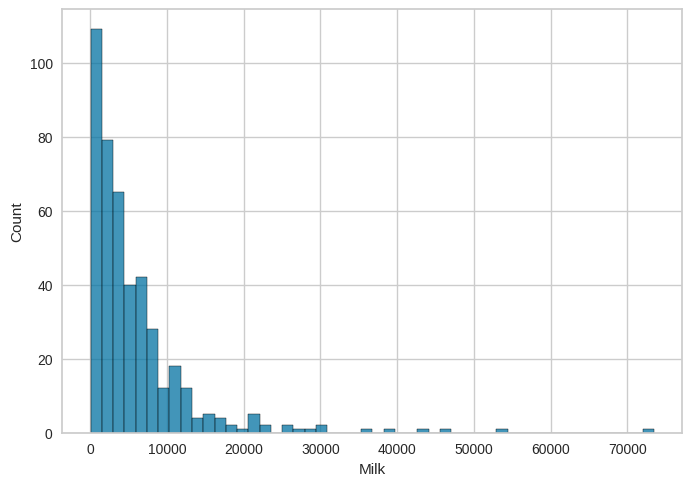

Grocery
Grocery
10391    2
6536     2
2405     2
2062     2
3600     2
        ..
5034     1
8282     1
7030     1
2591     1
542      1
Name: count, Length: 430, dtype: int64


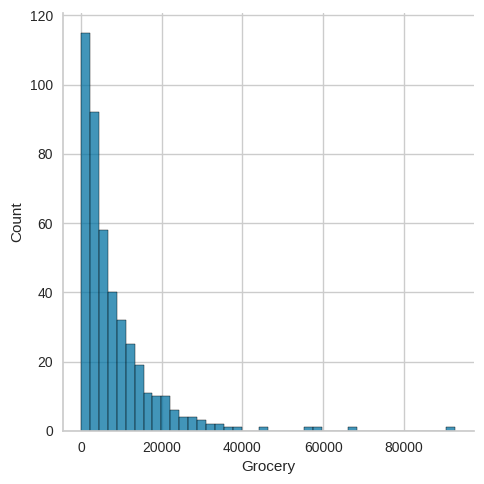

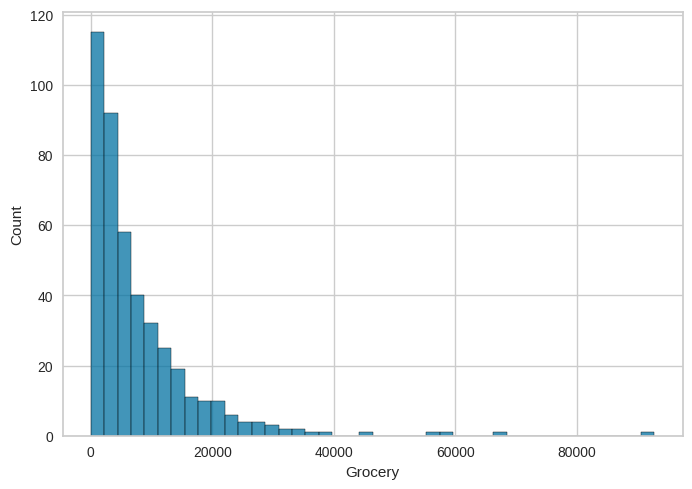

Frozen
Frozen
830     2
364     2
1285    2
402     2
848     2
       ..
825     1
155     1
661     1
4575    1
800     1
Name: count, Length: 426, dtype: int64


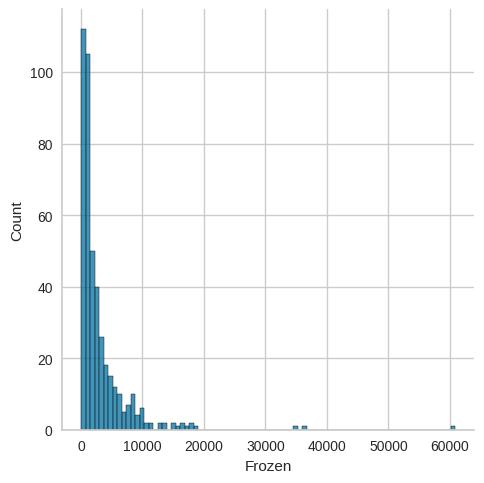

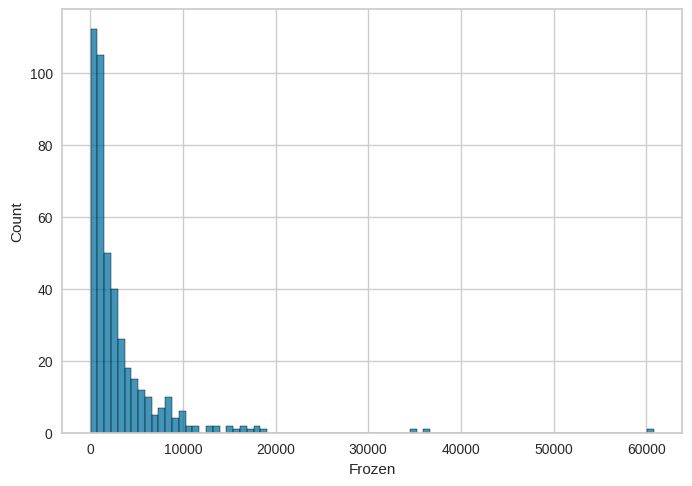

Detergents_Paper
Detergents_Paper
955    2
256    2
69     2
918    2
483    2
      ..
51     1
960    1
637    1
249    1
255    1
Name: count, Length: 417, dtype: int64


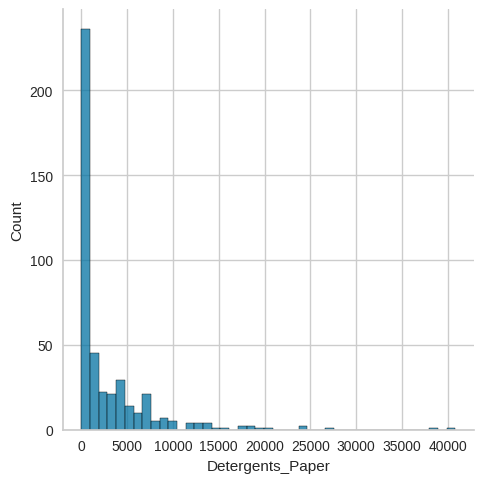

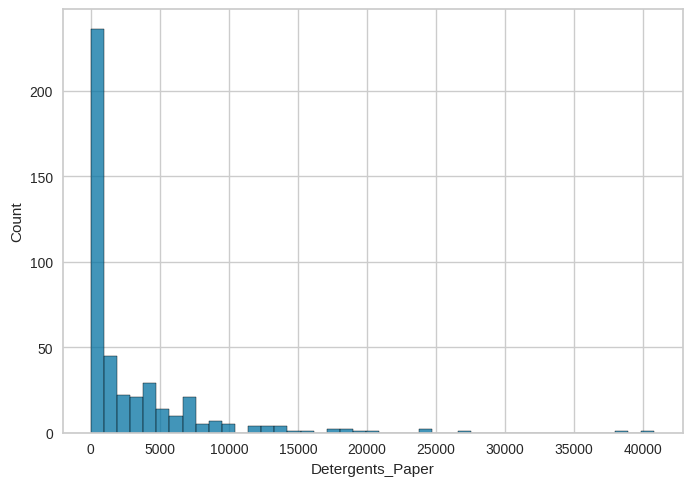

Delicassen
Delicassen
834     4
3       4
610     3
1215    3
548     3
       ..
2616    1
1450    1
318     1
201     1
3637    1
Name: count, Length: 403, dtype: int64


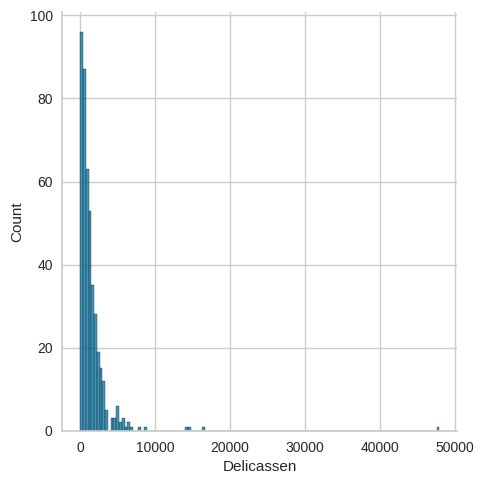

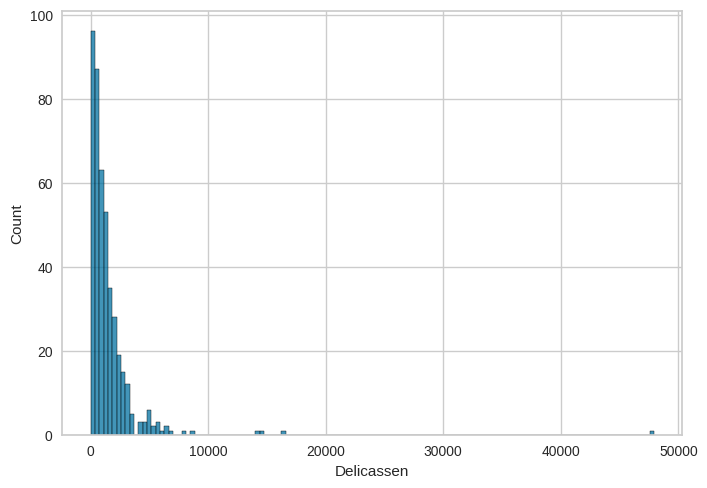

In [188]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  plt.show()
  sns.displot(df[col])
  plt.show()
  sns.histplot(df[col])
  plt.show()


df['Fresh'] = np.log(df['Fresh'])
df['Milk'] = np.log(df['Milk'])
df['Grocery'] = np.log(df['Grocery'])
df['Frozen'] = np.log(df['Frozen'])
df['Detergents_Paper'] = np.log(df['Detergents_Paper'])
df['Delicassen'] = np.log(df['Delicassen'])

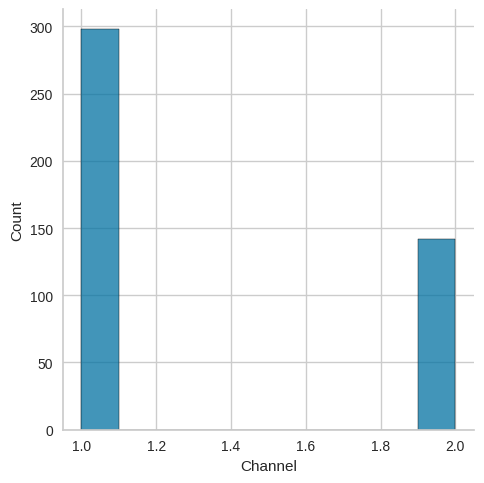

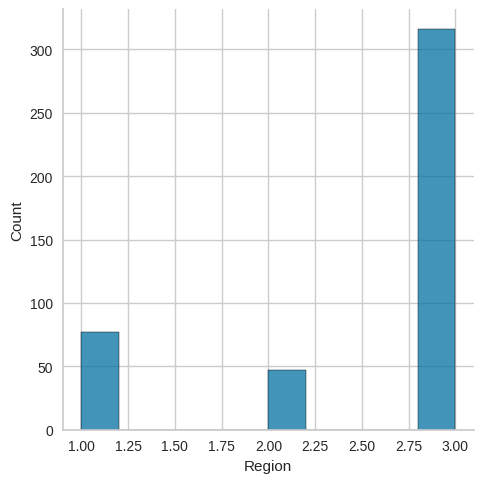

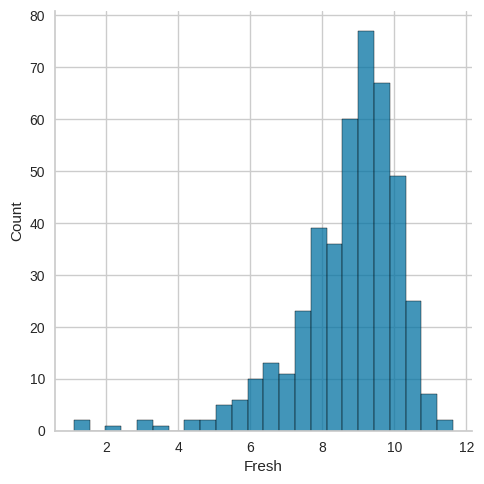

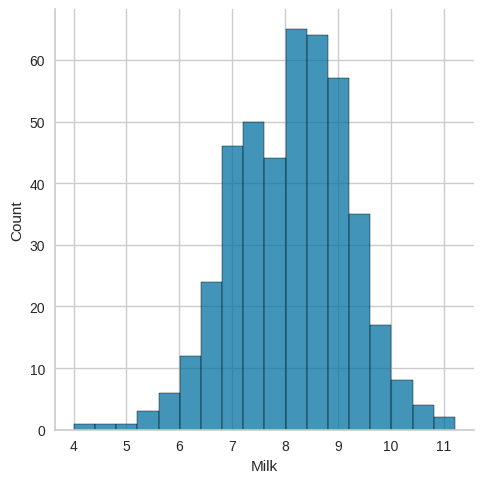

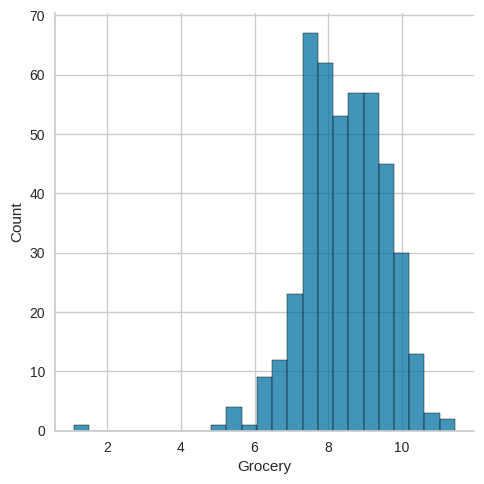

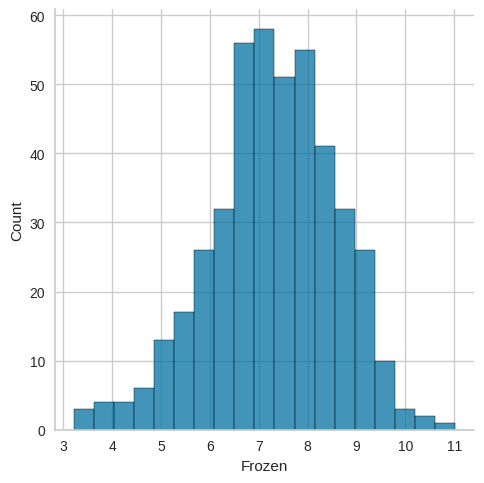

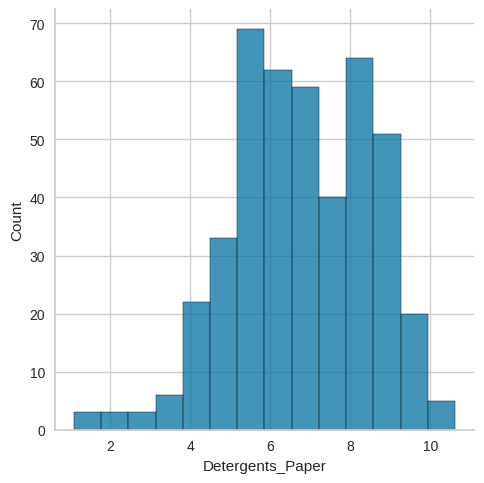

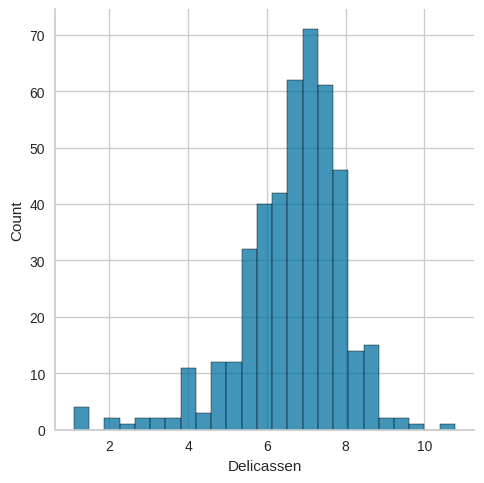

In [189]:
for col in df.columns:
  sns.displot(df[col])
  plt.show()

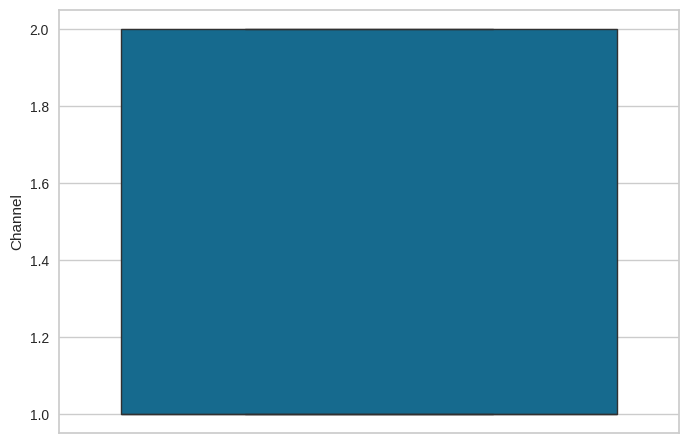

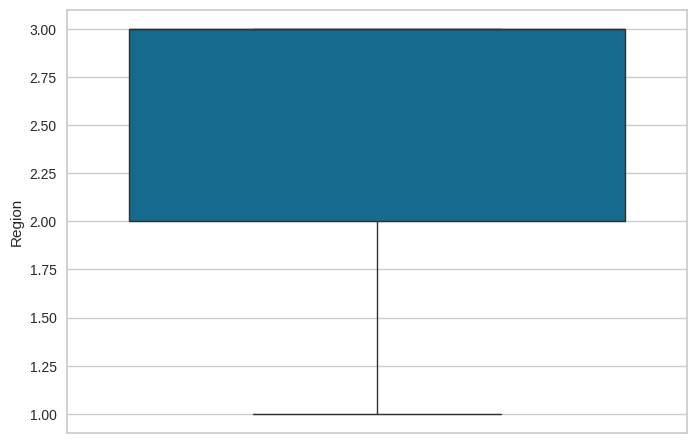

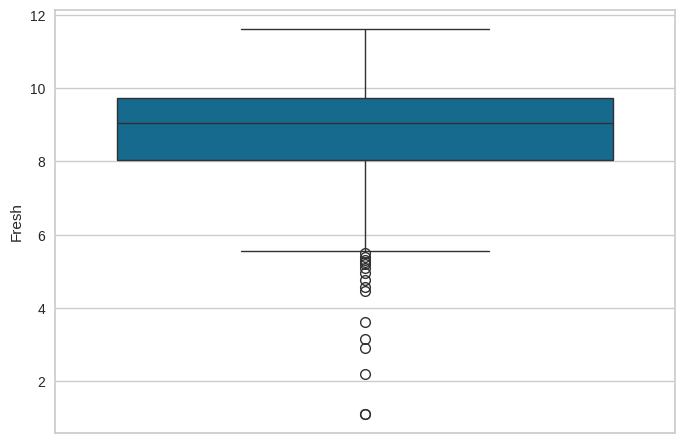

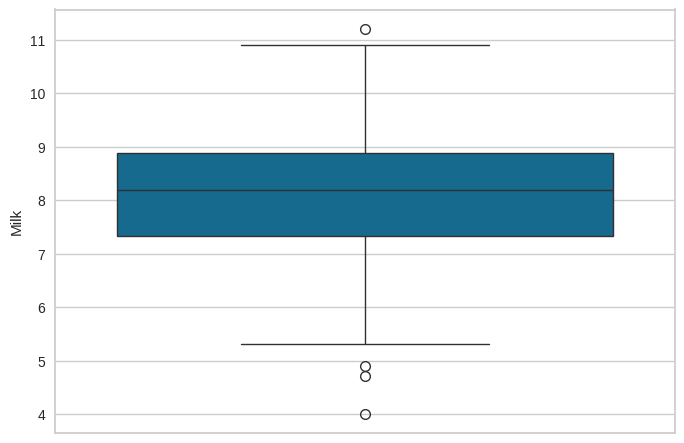

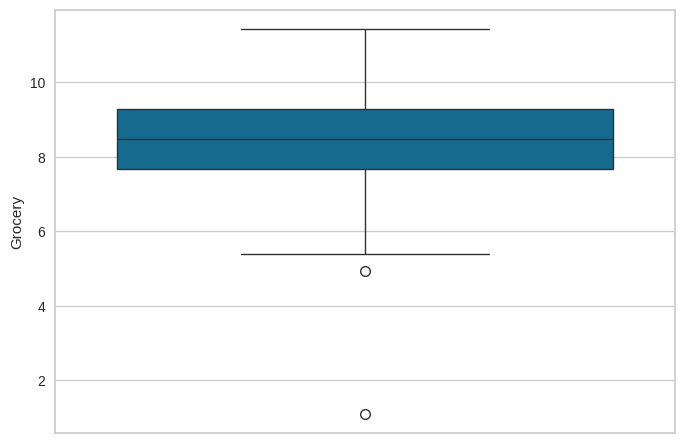

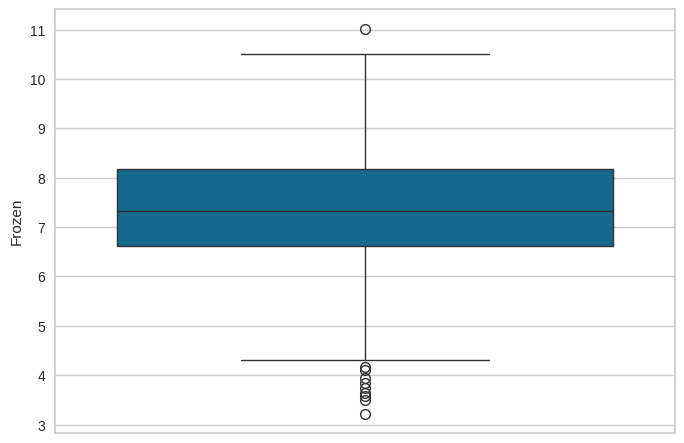

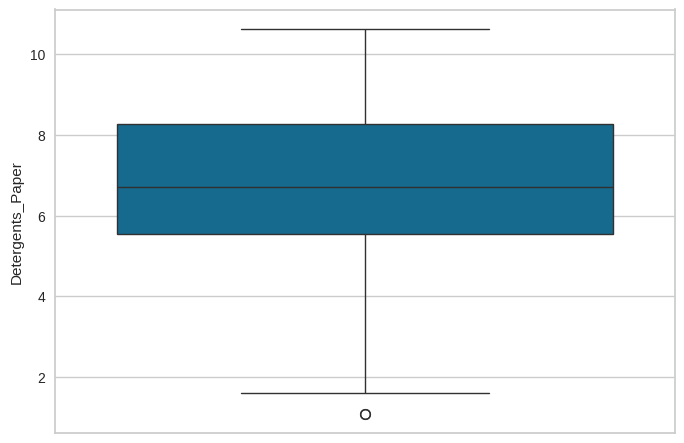

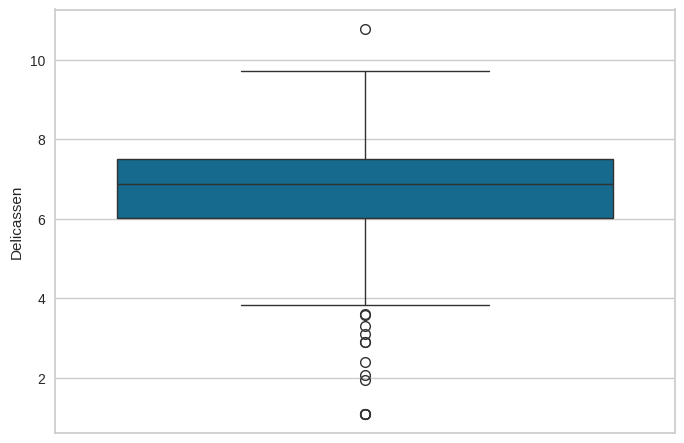

In [190]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

In [191]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# for col in df.columns:
#   df[col] = scaler.fit_transform(df[[col]])


In [192]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,2,3,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,2,3,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,1,3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,2,3,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [193]:
df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,0.468052,0.774272,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.000000,1.000000,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,1.000000,2.000000,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,1.000000,3.000000,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,2.000000,3.000000,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,2.000000,3.000000,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


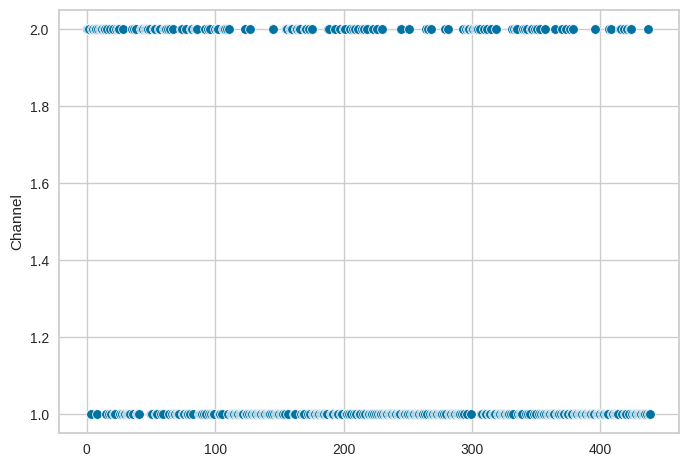

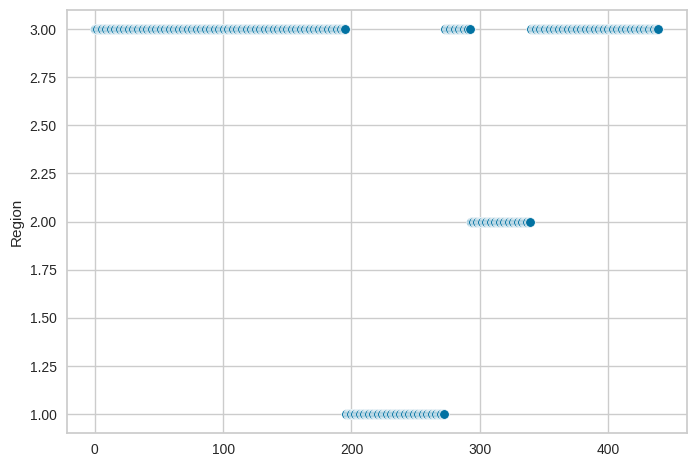

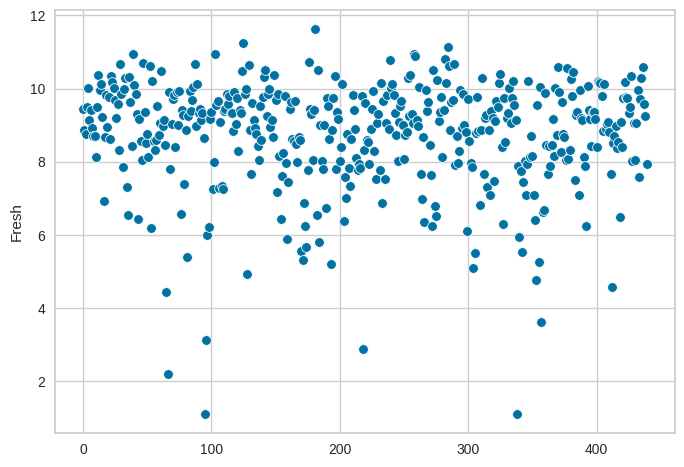

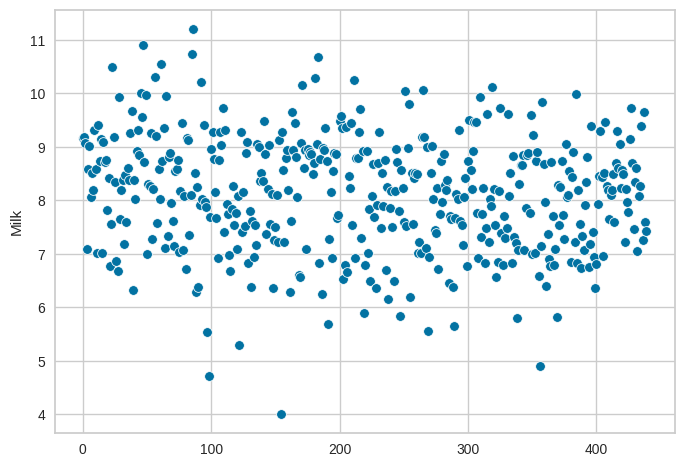

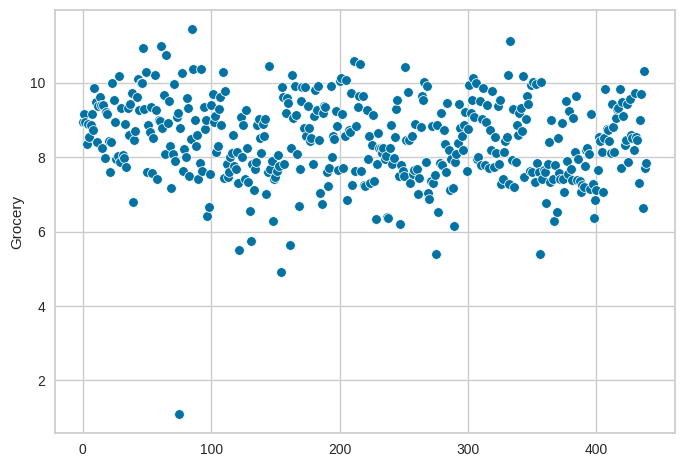

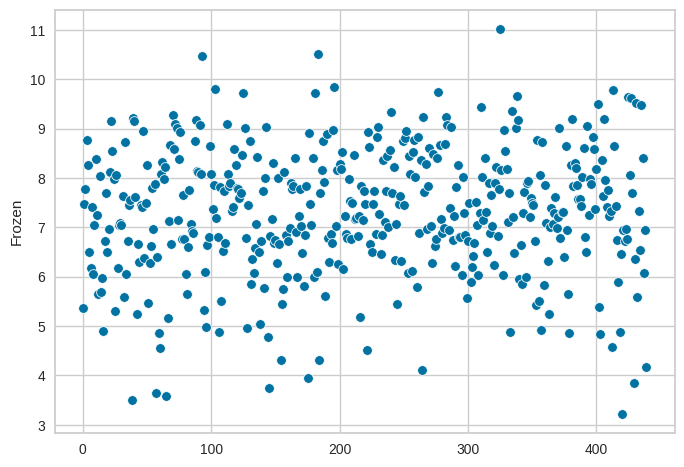

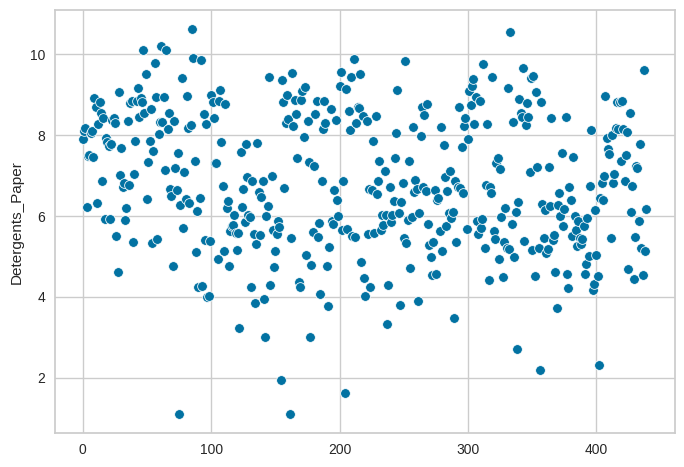

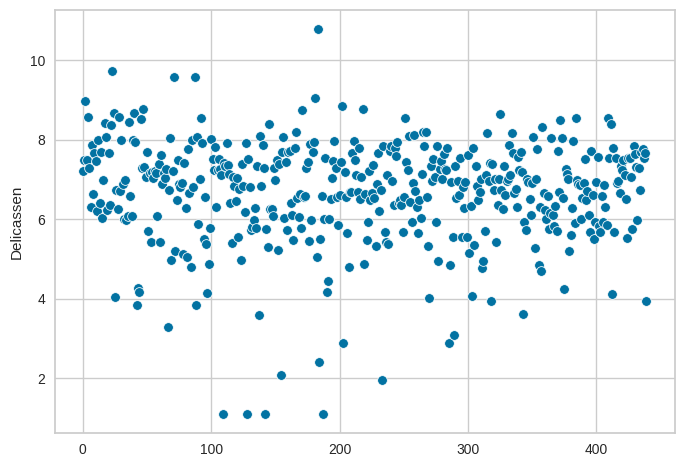

In [194]:
for col in df.columns:
  sns.scatterplot(df[col])
  plt.show()

Elbow Method to determine the number of clusters to be formed:


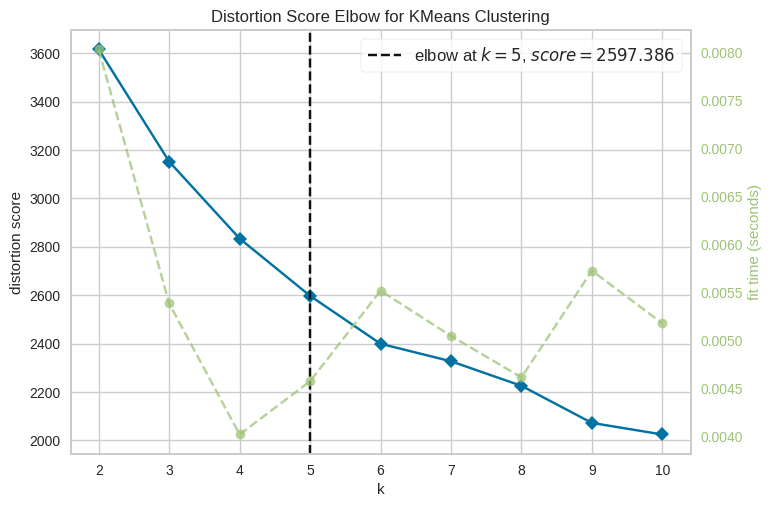

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [195]:
# Quick examination of elbow method to find numbers of clusters to make.

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

In [196]:
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T



,count,mean,std,min,25%,50%,75%,max
col1,440.0,6.459479e-16,2.227440,-8.309177,-1.631509,-0.242783,1.864521,5.745429
col2,440.0,-2.906766e-16,1.739274,-7.271255,-0.840528,0.121158,1.028268,5.343060
col3,440.0,-2.745279e-16,1.129190,-6.450724,-0.667036,-0.016530,0.654473,3.753472


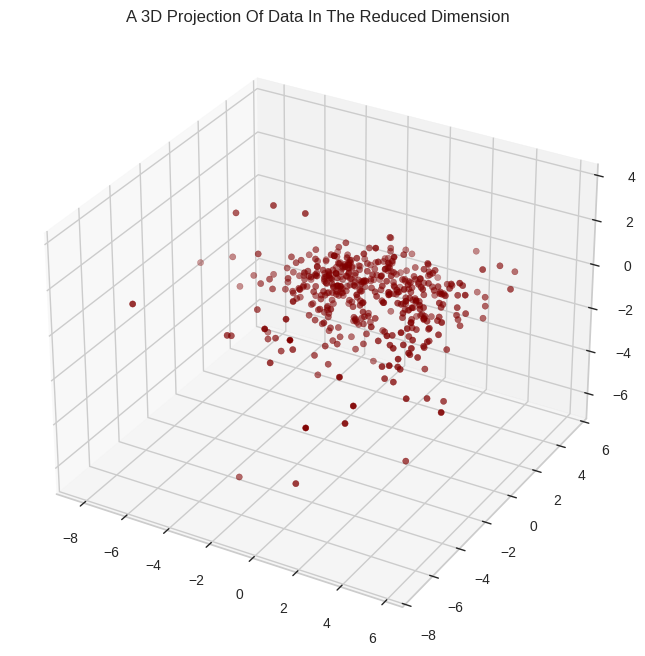

In [197]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


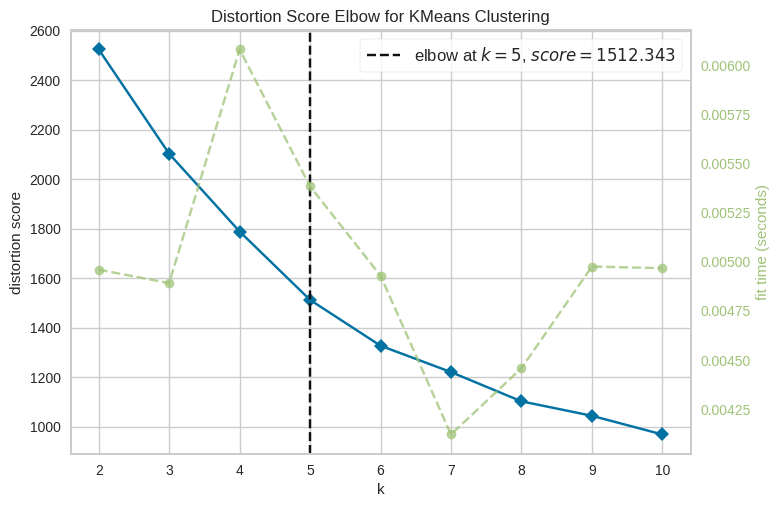

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [198]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [199]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

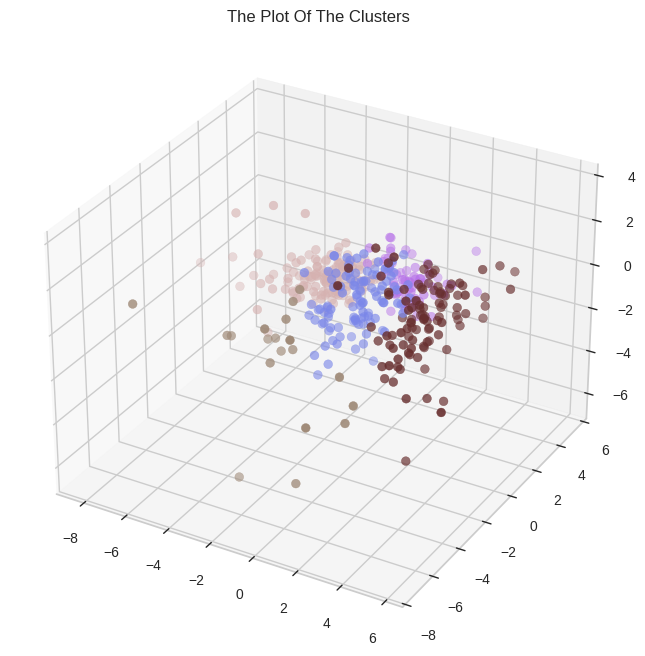

In [200]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

/tmp/ipython-input-1451024257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Clusters"], palette= pal)
/tmp/ipython-input-1451024257.py:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=df["Clusters"], palette= pal)


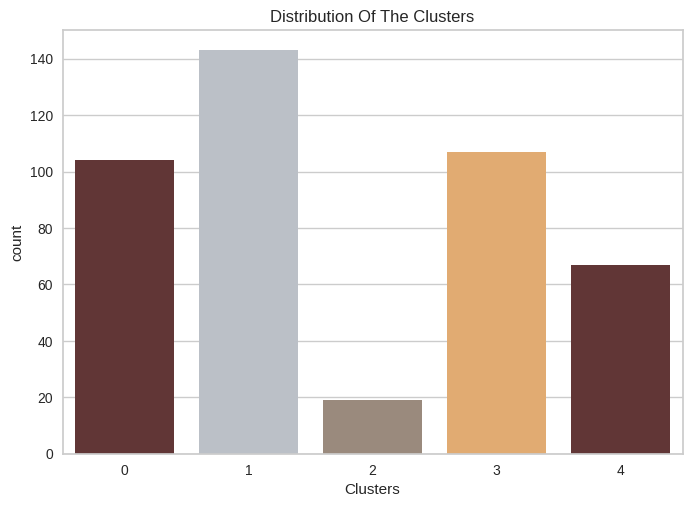

In [201]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [202]:
df.columns


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Clusters'],
      dtype='object')

/tmp/ipython-input-3573358773.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.scatterplot(data = df,x=df['Channel'], y=df['Region'],hue=df["Clusters"], palette= pal)


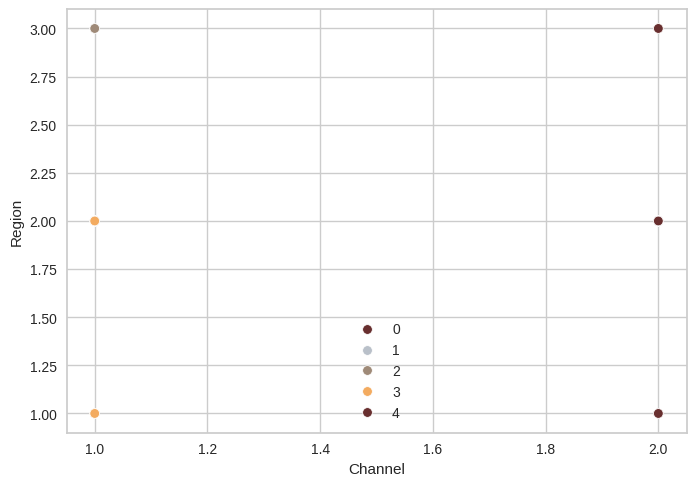

/tmp/ipython-input-3573358773.py:5: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.scatterplot(data = df,x=df['Fresh'], y=df[ 'Grocery'],hue=df["Clusters"], palette= pal)


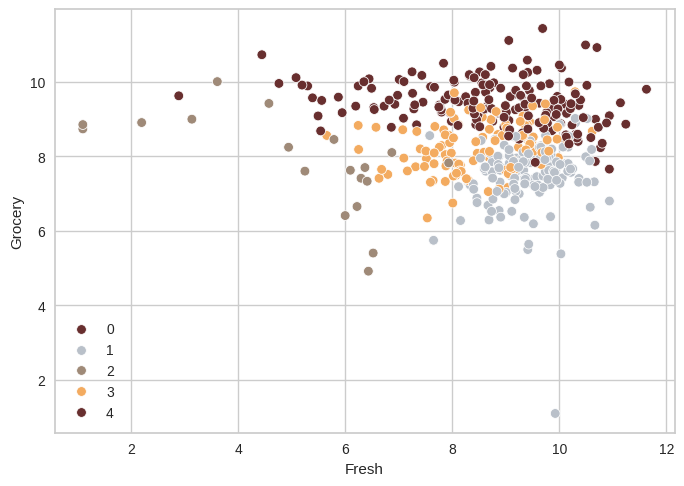

/tmp/ipython-input-3573358773.py:9: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.scatterplot(data = df,x=df['Milk'], y=df[ 'Frozen'],hue=df["Clusters"], palette= pal)


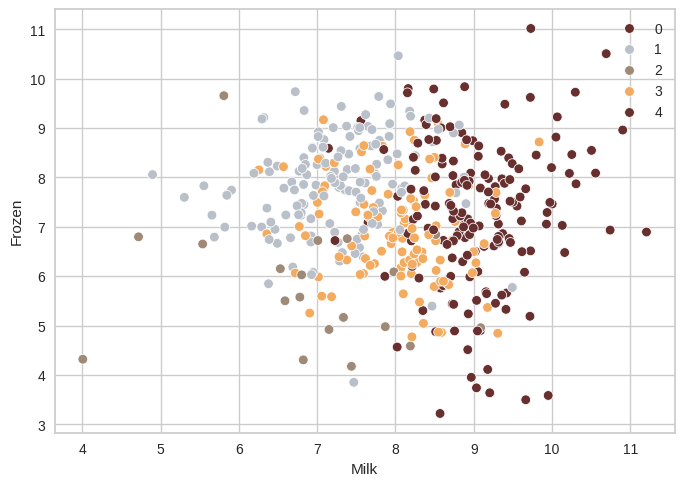

/tmp/ipython-input-3573358773.py:13: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.scatterplot(data = df,x=df['Milk'], y=df[ 'Detergents_Paper'],hue=df["Clusters"], palette= pal)


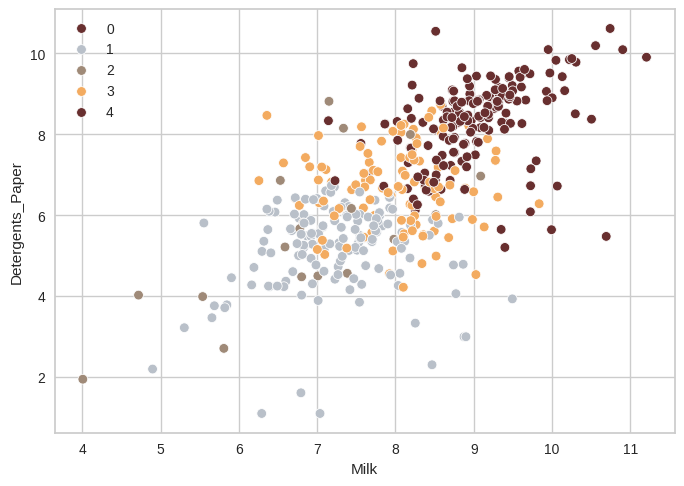

/tmp/ipython-input-3573358773.py:17: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.scatterplot(data = df,x=df['Milk'], y=df[ 'Delicassen'],hue=df["Clusters"], palette= pal)


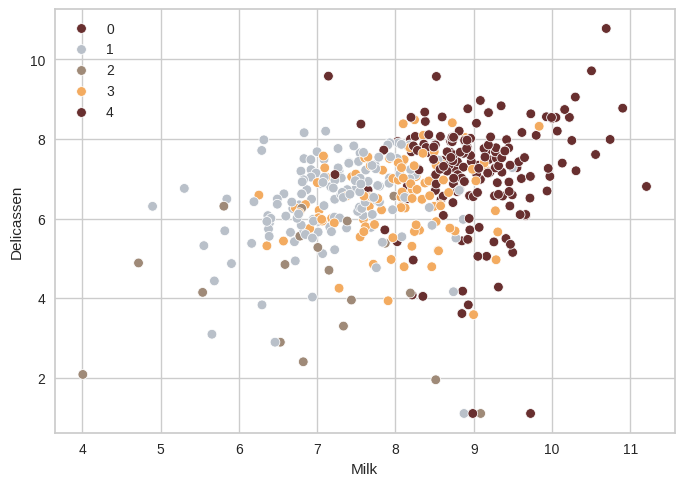

In [203]:
pl = sns.scatterplot(data = df,x=df['Channel'], y=df['Region'],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

pl = sns.scatterplot(data = df,x=df['Fresh'], y=df[ 'Grocery'],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

pl = sns.scatterplot(data = df,x=df['Milk'], y=df[ 'Frozen'],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

pl = sns.scatterplot(data = df,x=df['Milk'], y=df[ 'Detergents_Paper'],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

pl = sns.scatterplot(data = df,x=df['Milk'], y=df[ 'Delicassen'],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()



In [204]:
kmeans = KMeans(n_clusters=5 ,init= "k-means++" )
kmeans.fit(PCA_ds)

KMeans(n_clusters=5)

In [205]:
kmeans.fit_predict(df)



print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(PCA_ds, kmeans.labels_))
print('Calinski Harabasz Score: %0.3f' % metrics.calinski_harabasz_score(PCA_ds, kmeans.labels_))
print('Davies-Bouldin Score: %0.3f' % metrics.davies_bouldin_score(PCA_ds, kmeans.labels_))




Silhouette Coefficient: 0.384
Calinski Harabasz Score: 222.076
Davies-Bouldin Score: 1.041


In [206]:
# check all clustring model
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering




In [207]:
dbscan = DBSCAN(eps=3, min_samples=7)
dbscan.fit(PCA_ds)
OPTICS = OPTICS(min_samples=7)
OPTICS.fit(PCA_ds)
BIRCH = Birch(n_clusters=5)
BIRCH.fit(PCA_ds)

AffinityPropagation = AffinityPropagation(preference=-5, damping=0.95)
AffinityPropagation.fit(PCA_ds)


KMeans = KMeans(n_clusters=5)
KMeans.fit(PCA_ds)

AgglomerativeClustering = AgglomerativeClustering(n_clusters=5)
AgglomerativeClustering.fit(PCA_ds)


AgglomerativeClustering(n_clusters=5)

In [208]:
KMeans.fit_predict(df)
AffinityPropagation.fit_predict(df)
BIRCH.fit_predict(df)
OPTICS.fit_predict(df)
dbscan.fit_predict(df)
AgglomerativeClustering.fit_predict(df)


array([2, 3, 3, 0, 3, 3, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 2, 3, 0,
       3, 3, 3, 1, 0, 0, 1, 2, 3, 2, 2, 0, 2, 1, 3, 1, 1, 0, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 3, 1, 2, 1,
       4, 1, 2, 2, 0, 3, 2, 3, 3, 0, 2, 1, 0, 2, 2, 1, 3, 0, 2, 1, 1, 3,
       0, 3, 0, 0, 1, 0, 1, 4, 4, 0, 0, 0, 3, 1, 1, 3, 2, 0, 1, 1, 1, 4,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0, 3, 4, 0, 0, 0,
       2, 0, 0, 0, 3, 2, 2, 2, 3, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 3, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1,
       3, 2, 0, 2, 3, 3, 1, 3, 4, 0, 2, 4, 1, 1, 0, 0, 0, 1, 0, 0, 3, 1,
       2, 2, 1, 1, 3, 4, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 2, 0, 2, 3, 2, 2, 0, 3, 2, 0, 4, 0, 2, 0, 0, 0, 3, 0, 0,
       0, 3, 3, 1, 0, 0, 2, 2, 2, 1, 0, 2, 3, 0, 2, 2, 3, 3, 2, 0, 0, 2,
       1, 3, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3, 3, 0, 3, 0,
       2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 3,

In [209]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(PCA_ds, KMeans.labels_))
print('Calinski Harabasz Score: %0.3f' % metrics.calinski_harabasz_score(PCA_ds, KMeans.labels_))
print('Davies-Bouldin Score: %0.3f' % metrics.davies_bouldin_score(PCA_ds, KMeans.labels_))

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(PCA_ds, AffinityPropagation.labels_))
print('Calinski Harabasz Score: %0.3f' % metrics.calinski_harabasz_score(PCA_ds, AffinityPropagation.labels_))
print('Davies-Bouldin Score: %0.3f' % metrics.davies_bouldin_score(PCA_ds, AffinityPropagation.labels_))

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(PCA_ds, BIRCH.labels_))
print('Calinski Harabasz Score: %0.3f' % metrics.calinski_harabasz_score(PCA_ds, BIRCH.labels_))
print('Davies-Bouldin Score: %0.3f' % metrics.davies_bouldin_score(PCA_ds, BIRCH.labels_))

print(f"Silhouette Coefficient: %0.3f" % metrics.silhouette_score(PCA_ds, OPTICS.labels_))
print(f'Calinski Harabasz Score: %0.3f' % metrics.calinski_harabasz_score(PCA_ds, OPTICS.labels_))
print(f'Davies-Bouldin Score: %0.3f' % metrics.davies_bouldin_score(PCA_ds, OPTICS.labels_))

print(f"Silhouette Coefficient: %0.3f" % metrics.silhouette_score(PCA_ds, dbscan.labels_))
print(f'Calinski Harabasz Score: %0.3f' % metrics.calinski_harabasz_score(PCA_ds, dbscan.labels_))
print(f'Davies-Bouldin Score: %0.3f' % metrics.davies_bouldin_score(PCA_ds, dbscan.labels_))

print(f"Silhouette Coefficient: %0.3f" % metrics.silhouette_score(PCA_ds, AgglomerativeClustering.labels_))
print(f'Calinski Harabasz Score: %0.3f' % metrics.calinski_harabasz_score(PCA_ds, AgglomerativeClustering.labels_))
print(f'Davies-Bouldin Score: %0.3f' % metrics.davies_bouldin_score(PCA_ds, AgglomerativeClustering.labels_))



Silhouette Coefficient: 0.313
Calinski Harabasz Score: 191.732
Davies-Bouldin Score: 1.206
Silhouette Coefficient: -0.110
Calinski Harabasz Score: 61.076
Davies-Bouldin Score: 1.808
Silhouette Coefficient: 0.368
Calinski Harabasz Score: 203.686
Davies-Bouldin Score: 1.056
Silhouette Coefficient: -0.110
Calinski Harabasz Score: 19.913
Davies-Bouldin Score: 1.908
Silhouette Coefficient: 0.386
Calinski Harabasz Score: 128.515
Davies-Bouldin Score: 1.648
Silhouette Coefficient: 0.359
Calinski Harabasz Score: 199.475
Davies-Bouldin Score: 1.078


In [210]:
import joblib

In [214]:
joblib.dump(kmeans ,"kmeans.pkl")

['kmeans.pkl']

In [215]:
# deployment
%pip install streamlit

In [216]:

import streamlit as st
import pandas as pd
import numpy as np
import joblib


